# Problem 1

## Context
CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

##Objective
The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

##Data Description
vote: Party choice: Conservative or Labour
age: in years
economic.cond.national: Assessment of current national economic conditions, 1 to 5.
economic.cond.household: Assessment of current household economic conditions, 1 to 5.
Blair: Assessment of the Labour leader, 1 to 5.
Hague: Assessment of the Conservative leader, 1 to 5.
Europe: an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.
political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
gender: female or male.

###Importing necessary libraries

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [3]:
# run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')
# drive already mounted if mounted

Mounted at /content/drive


**Load the Excel file available in the working or specified directory**

In [81]:
#tweets=pd.read_csv('/content/drive/MyDrive/Python Course/trump_tweets.csv')
data_df= pd.read_excel('/content/drive/MyDrive/Python Course/Election_Data.xlsx',sheet_name="Election_Dataset_Two Classes")

###Overview of the Dataset

###View the first  5 rows of the dataset

In [82]:
data_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


###View the Last 5 rows of the dataset

In [7]:
data_df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [83]:
data_df.shape
print("the no of rows ",data_df.shape[0]," ", "the no of colums ",data_df.shape[1])

the no of rows  1525   the no of colums  10


###Check the data types of the columns for the dataset

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [84]:
data_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,NaN,NaN,NaN,763.0,440.373894,1.0,382.0,763.0,1144.0,1525.0
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop Column Unnamed: 0 as there is no value

In [6]:
data_df=data_df.drop('Unnamed: 0',axis=1)

Check Null Values

In [87]:
data_df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

### Check for Duplicate Values

In [88]:
data_df.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [89]:
for feature in data_df.columns:
    if data_df[feature].dtype=='object':
           print(feature.upper() ," ",data_df[feature].nunique())
           print(data_df[feature].value_counts().sort_values())


VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


In [90]:
data_df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

### Drop Duplicate Values

In [91]:
data_df.drop_duplicates(inplace = True)

### Check Shape of Data

In [27]:
data_df.shape

(1517, 9)

### Descriptive Statistics of Data

In [92]:
data_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,NaN,NaN,NaN,763.0,440.373894,1.0,382.0,763.0,1144.0,1525.0
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


##Univariate Analysis

In [113]:
print('Age Description')
print(round(data['age'].describe(), 2))
print('Skewness =', round(data['age'].skew(), 2))

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Histogram of age')
sns.histplot(data['age'], kde=True, bins = 12);

plt.subplot(1,2,2)
plt.title('Boxplot of age')
sns.boxplot(x = 'age', data = data, showmeans=True);

Age Description


NameError: name 'data' is not defined

In [93]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-70-9bddaeee8680>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(data_df['age'])


Text(0.5, 1.0, 'age Distribution')

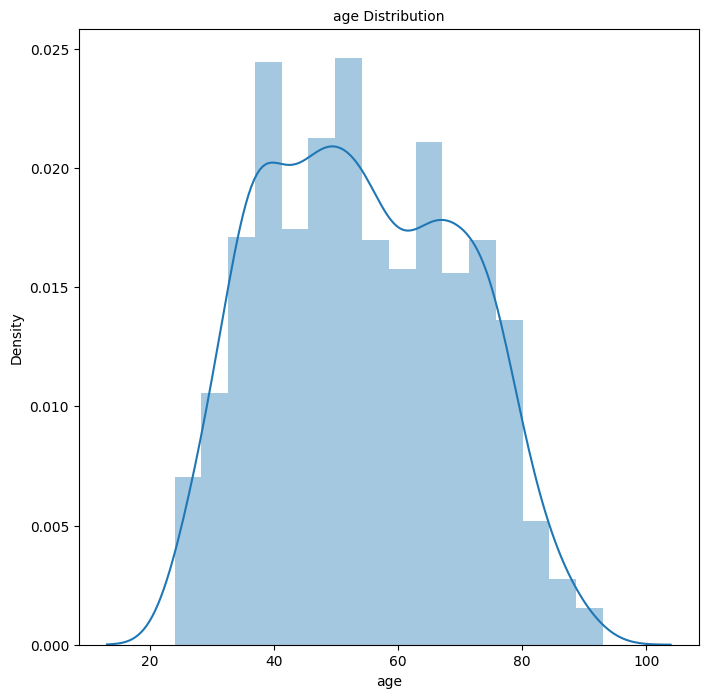

In [70]:
fig, axes1 = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8,8)
a = sns.distplot(data_df['age'])
a.set_title("age Distribution",fontsize=10)
#a = sns.boxplot(data_df['age'] , orient = "v")
#a.set_title("age Boxplot",fontsize=10)

Text(0.5, 1.0, 'age Boxplot')

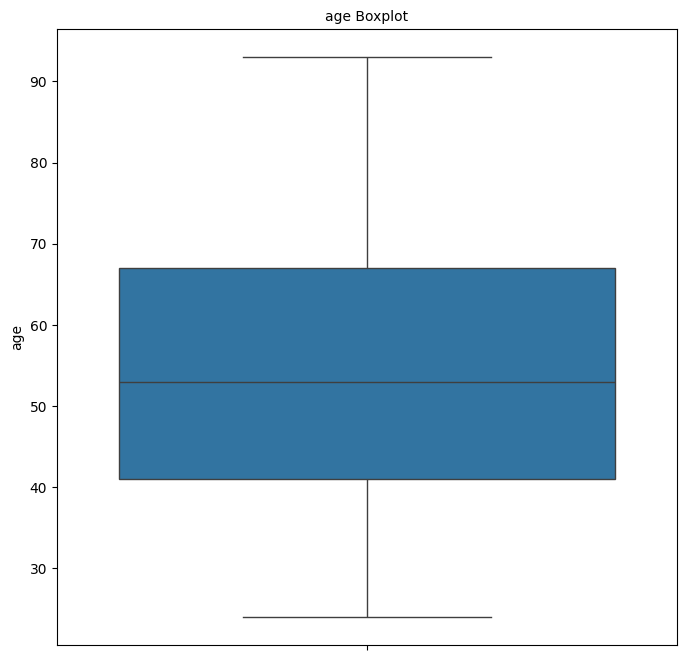

In [71]:
fig, axes1 = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(8,8)
a = sns.boxplot(data_df['age'] , orient = "v")
a.set_title("age Boxplot",fontsize=10)

In [86]:
labeled_barplot(data_df, "vote",perc = True)

NameError: name 'labeled_barplot' is not defined

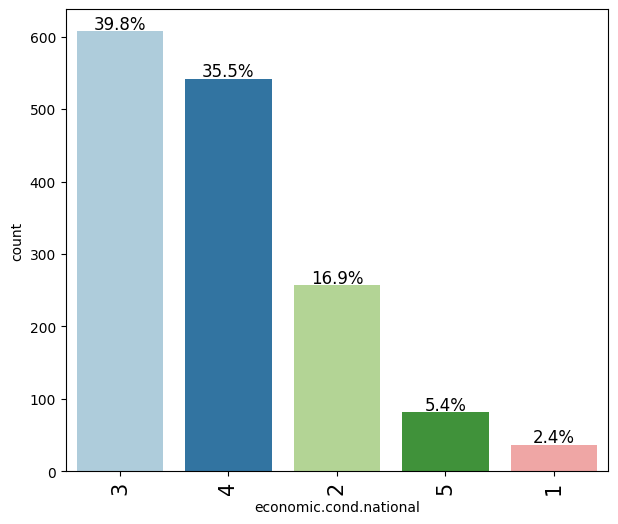

In [94]:
labeled_barplot(data_df, "economic.cond.national",perc = True)

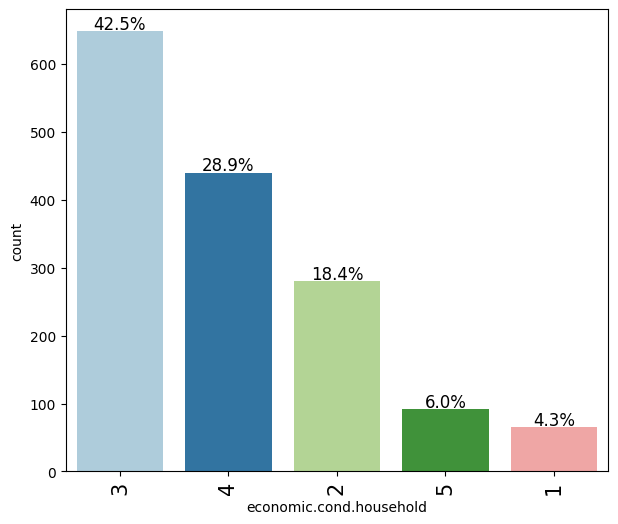

In [95]:
labeled_barplot(data_df, "economic.cond.household", perc=True)

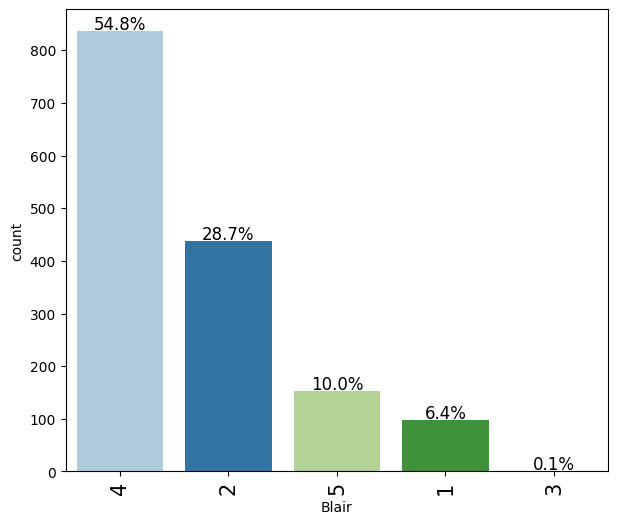

In [96]:
labeled_barplot(data_df, "Blair",perc = True)

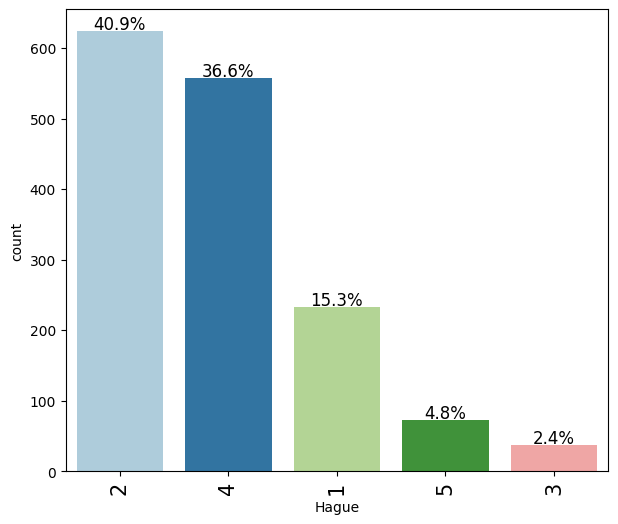

In [99]:
labeled_barplot(data_df, "Hague",perc = True)

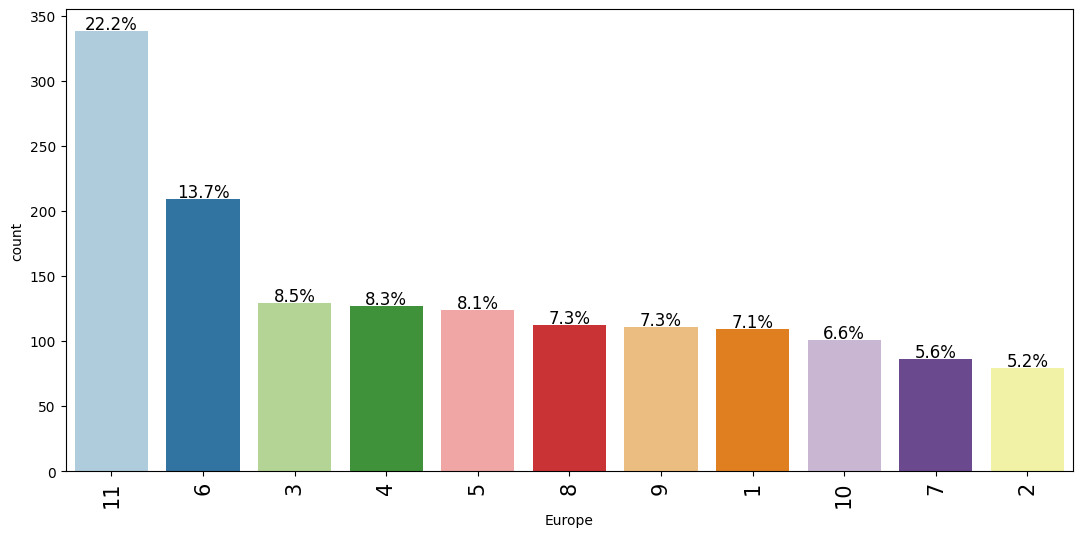

In [100]:
labeled_barplot(data_df, "Europe",perc = True)

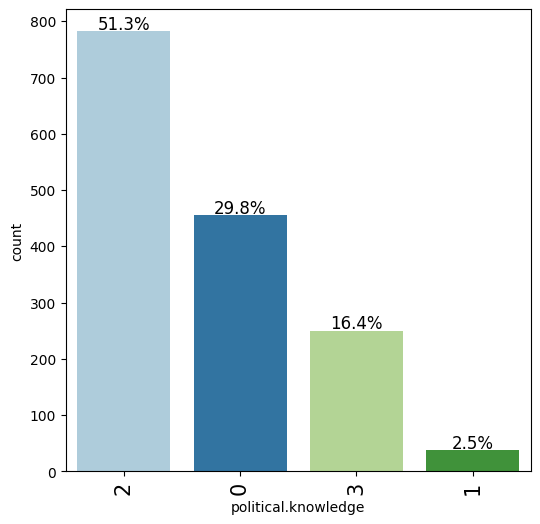

In [101]:
labeled_barplot(data_df, "political.knowledge",perc = True)

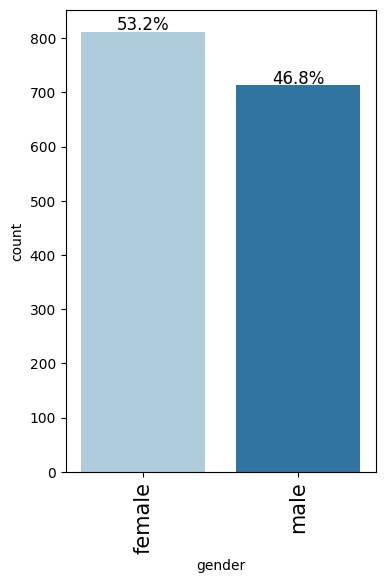

In [102]:
labeled_barplot(data_df, "gender",perc = True)

<ipython-input-42-9a9e0371f375>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(data_df['Hague'] , ax=axes[0][0])
<ipython-input-42-9a9e0371f375>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a=sns.distplot(data_df['Europe'], ax=axes[1][0])
<ipython-input-42-9a9e0371f375>:15: UserWarning: 

`distplot

Text(0.5, 1.0, 'political knowledge boxplot')

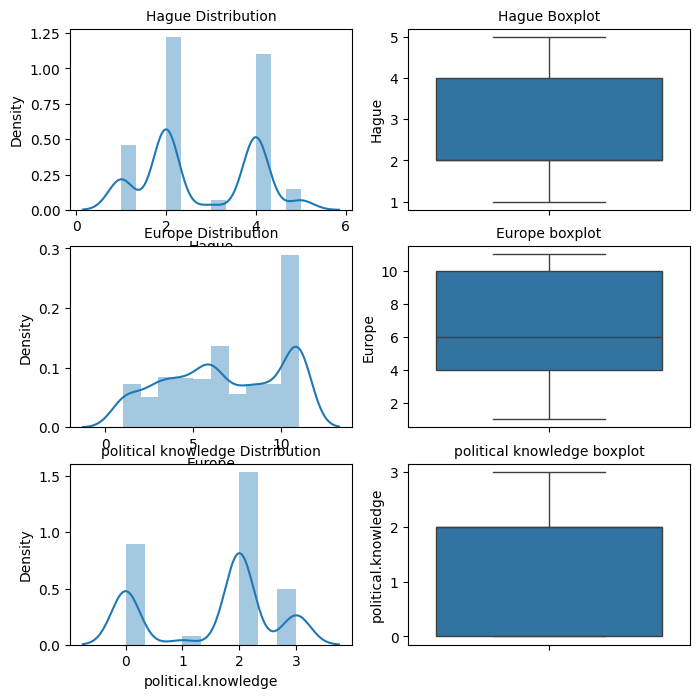

In [42]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(8,8)
a = sns.distplot(data_df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(data_df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(data_df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(data_df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=10)

a=sns.distplot(data_df['political.knowledge'], ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=10)

a=sns.boxplot(data_df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=10)

##Bivariate and Multivariate Analysis

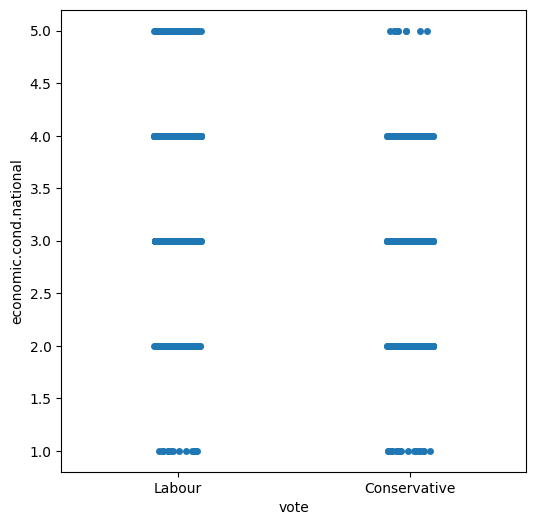

In [8]:
plt.figure(figsize=(6,6))
sns.stripplot(x=data_df["vote"],y=data_df['economic.cond.national'], jitter=True)
plt.show()

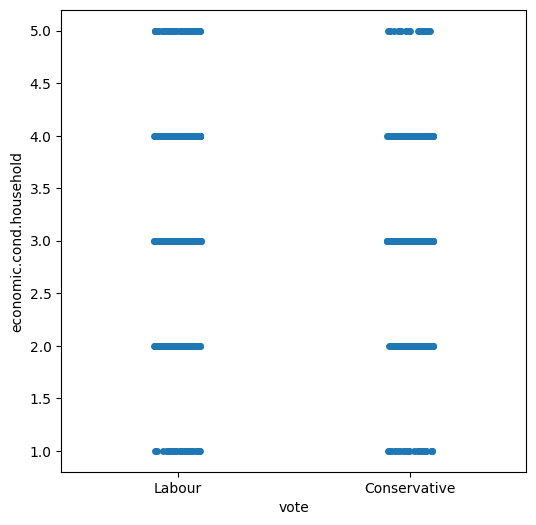

In [12]:
plt.figure(figsize=(6,6))
sns.stripplot(x=data_df["vote"],y=data_df['economic.cond.household'], jitter=True)
plt.show()

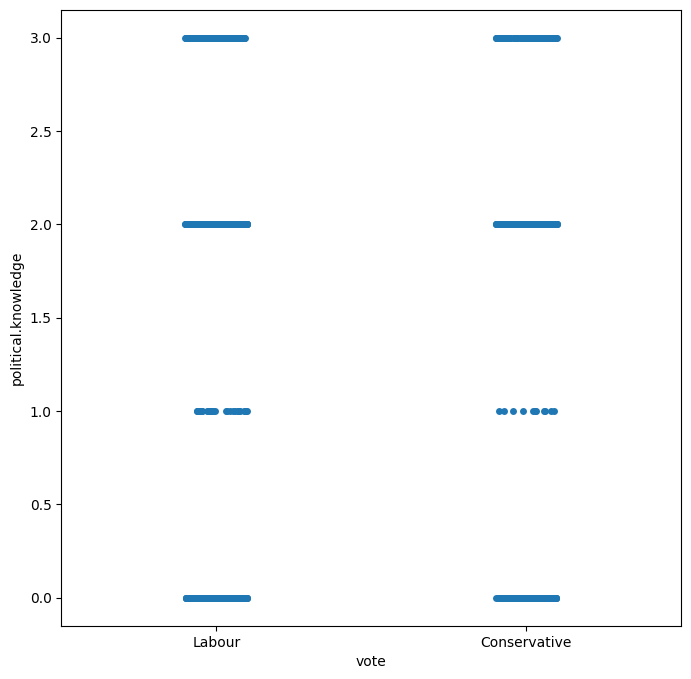

In [11]:
plt.figure(figsize=(8,8))
sns.stripplot(x=data_df['vote'],y=data_df['political.knowledge'], jitter=True)
plt.show()

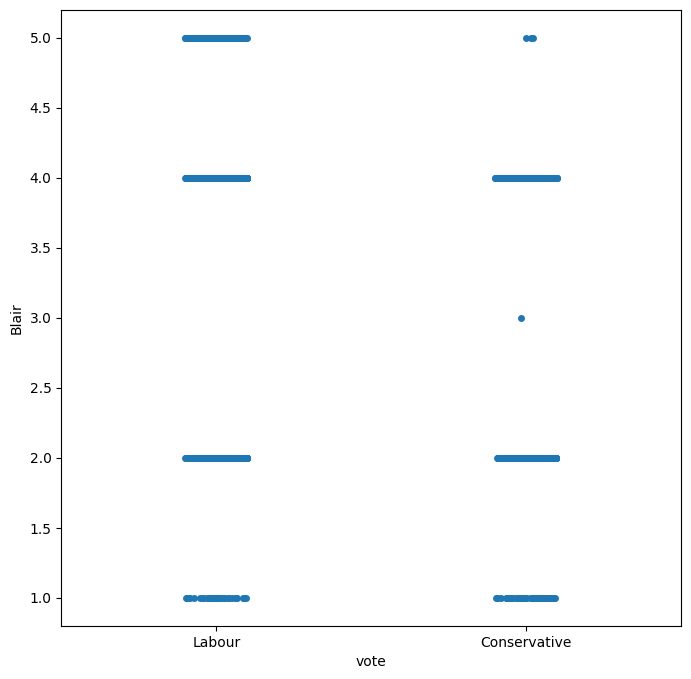

In [13]:
plt.figure(figsize=(8,8))
sns.stripplot(x=data_df["vote"],y=data_df['Blair'], jitter=True)
plt.show()

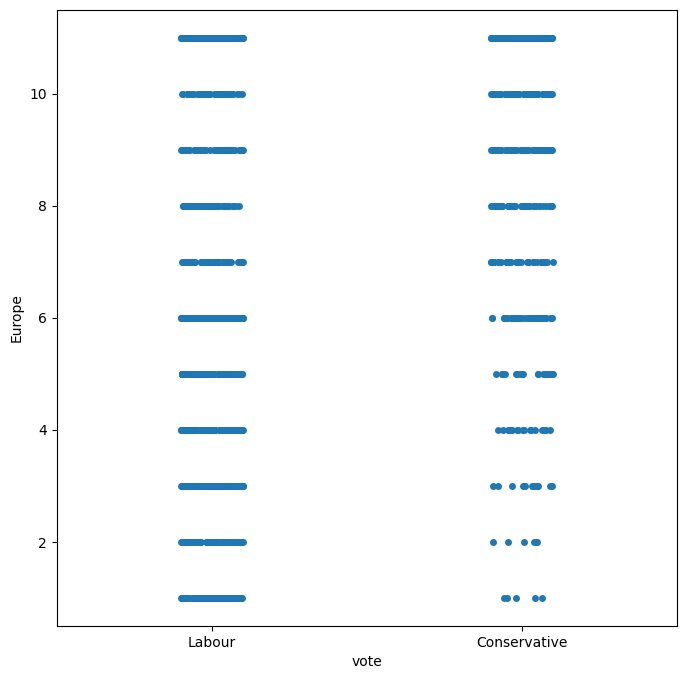

In [14]:
plt.figure(figsize=(8,8))
sns.stripplot(x=data_df["vote"], y=data_df['Europe'], jitter=True)
plt.show()

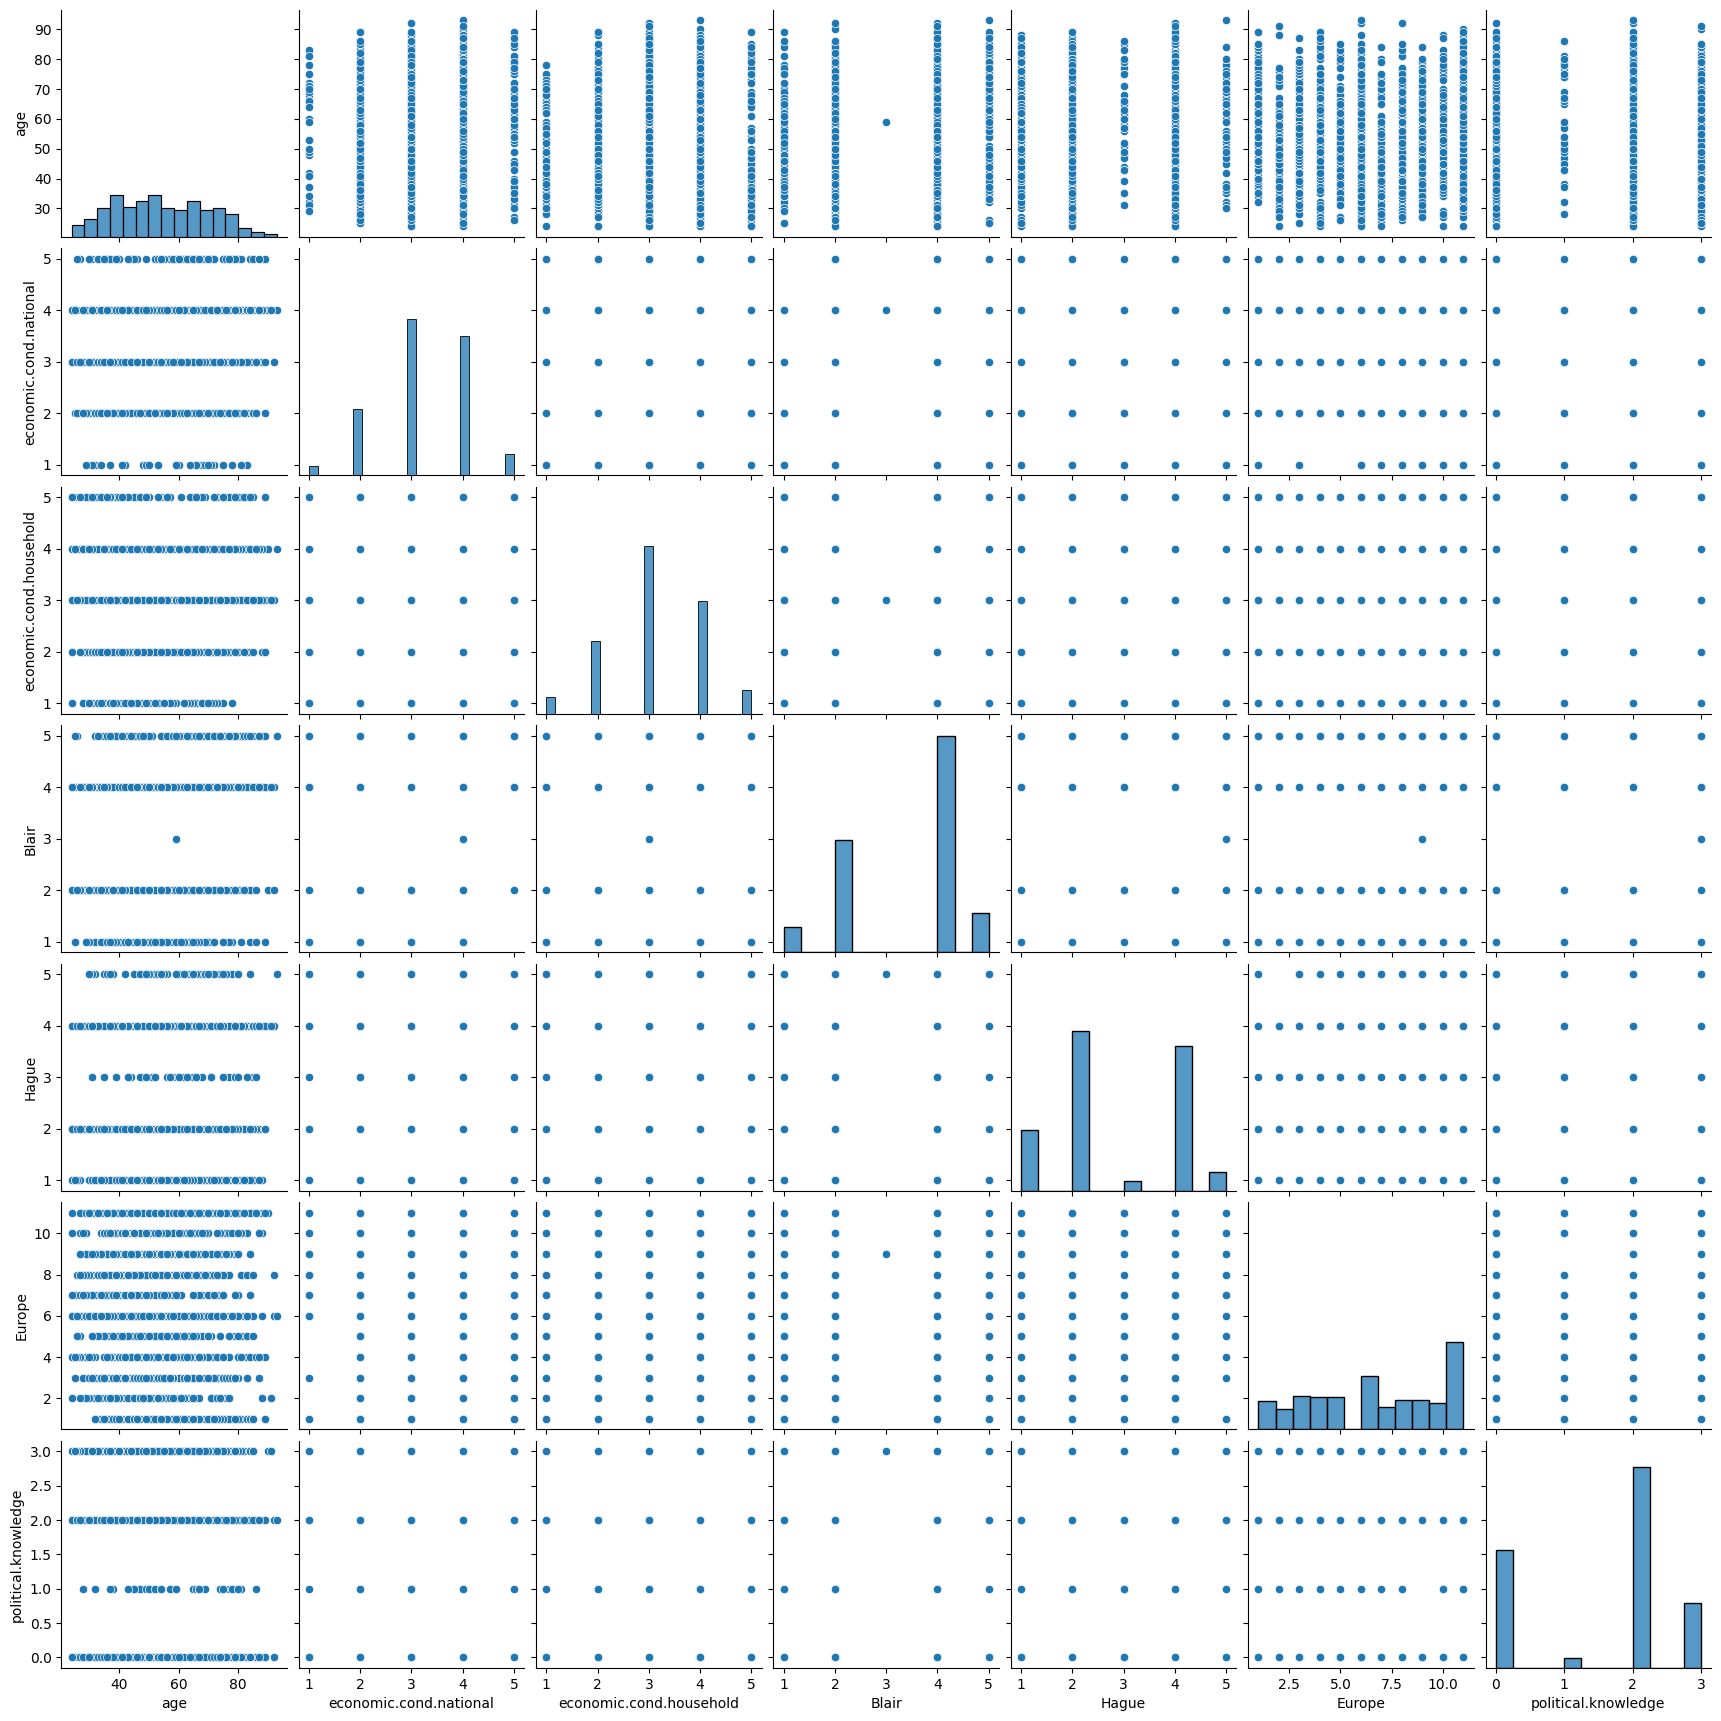

In [45]:
sns.pairplot(data_df)

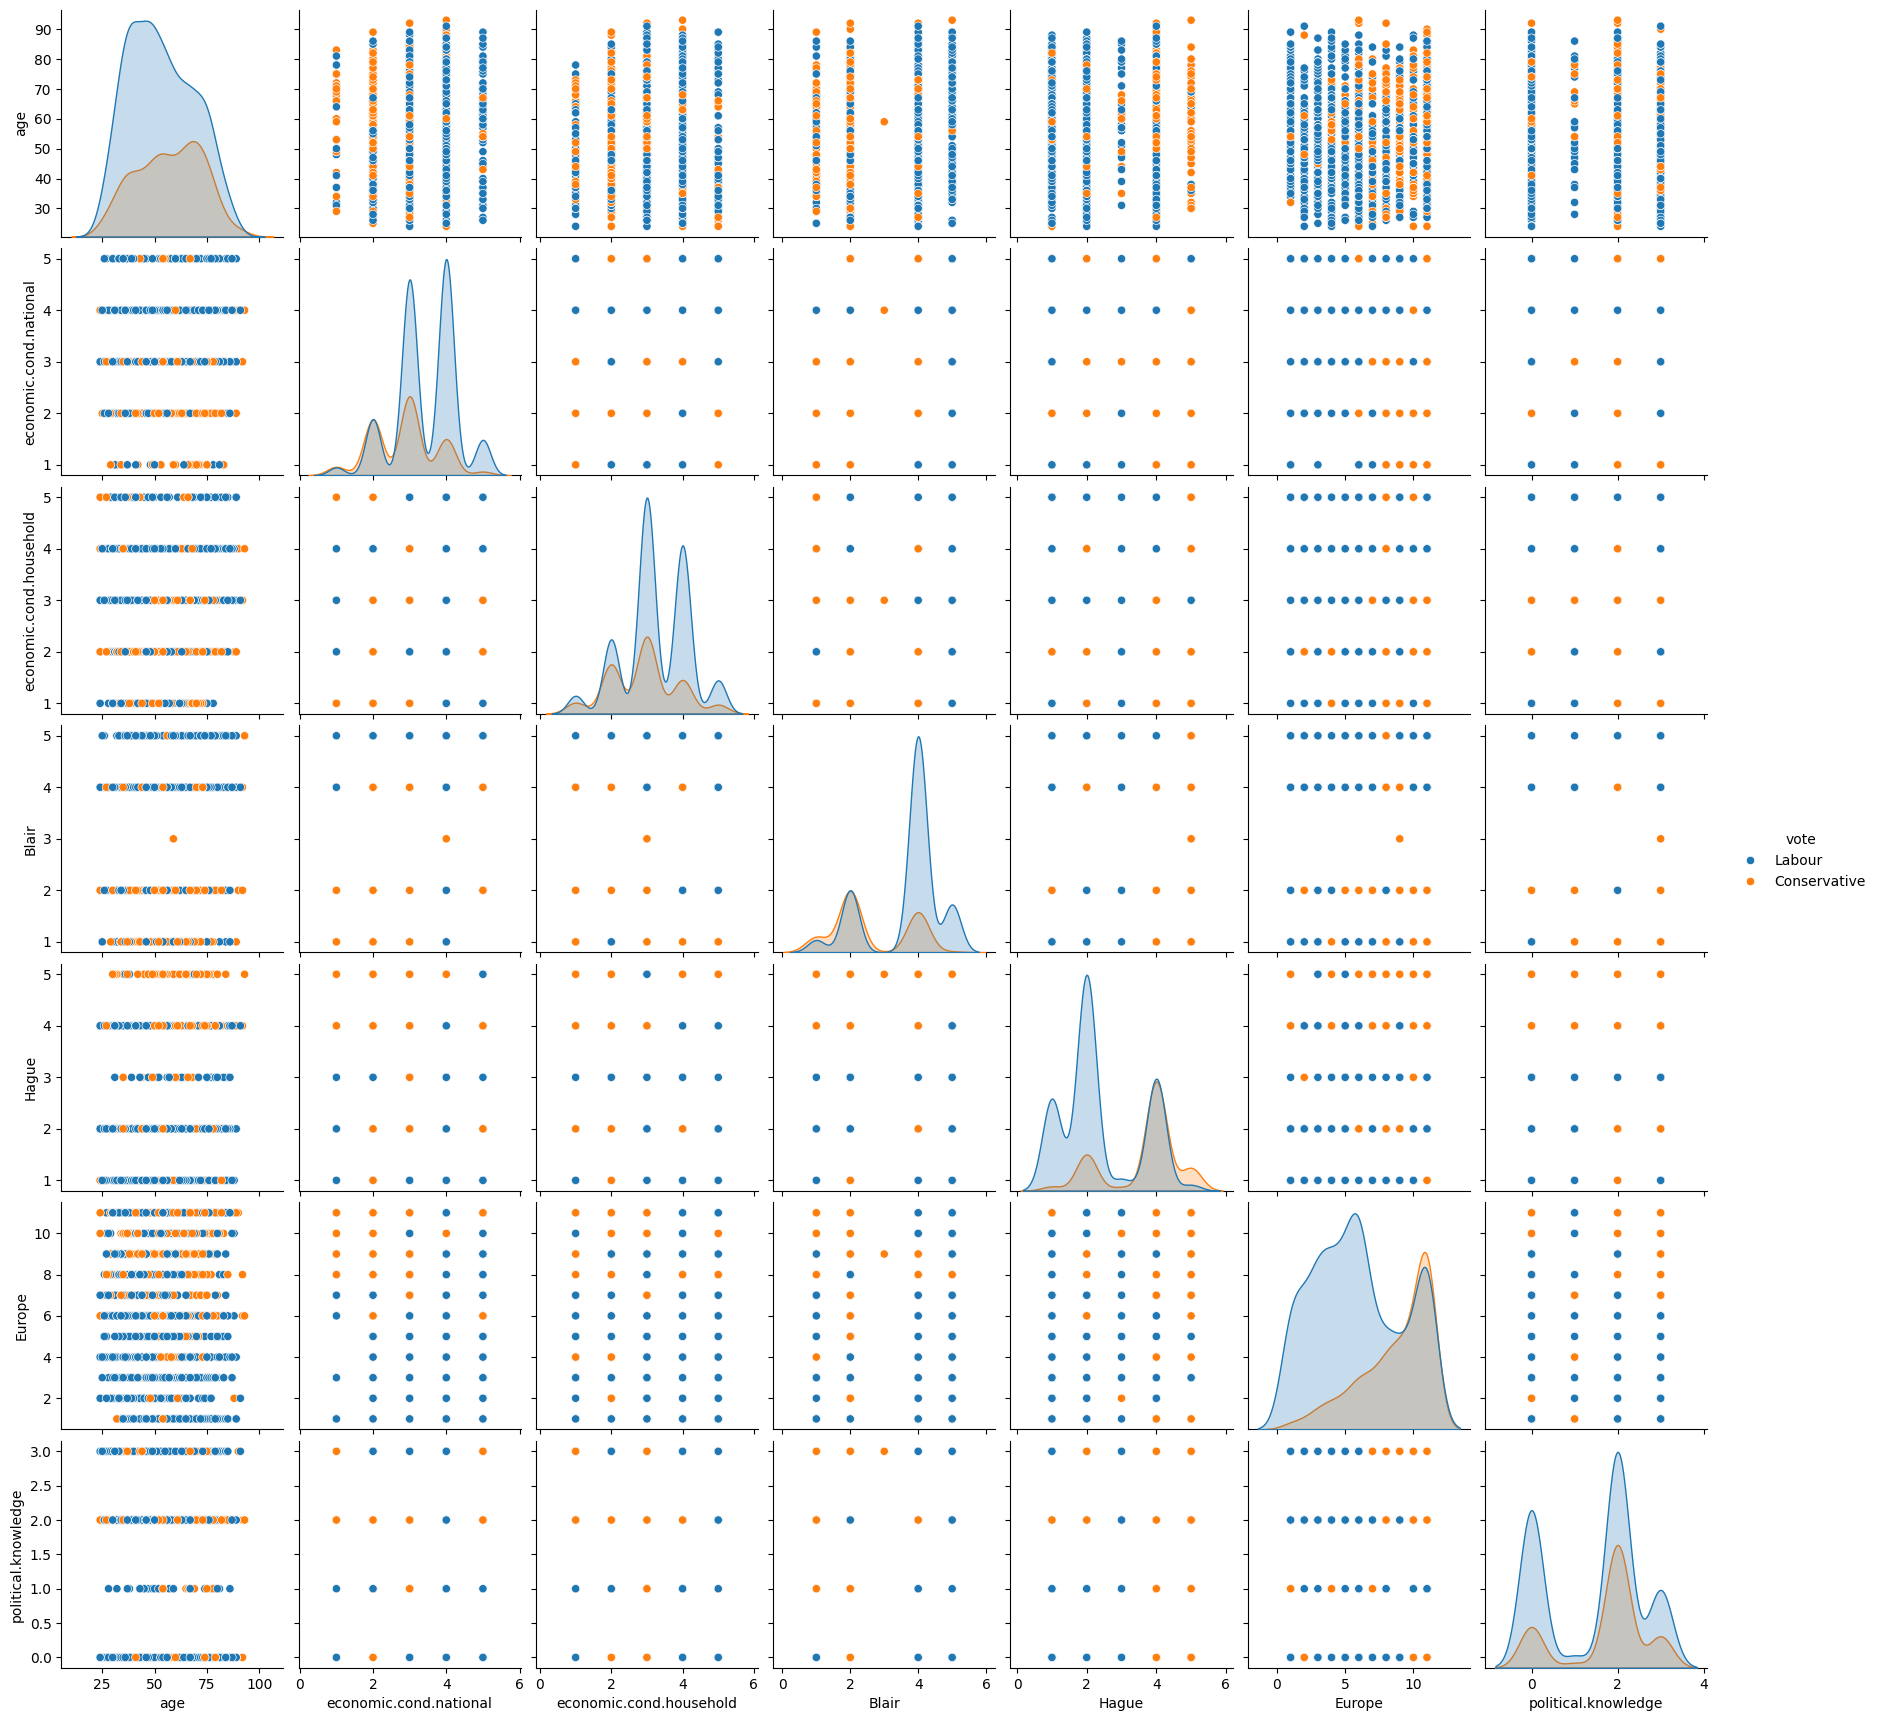

In [15]:
sns.pairplot(data_df, hue='vote')

<ipython-input-16-2e81238061b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(),annot=True)


<Axes: >

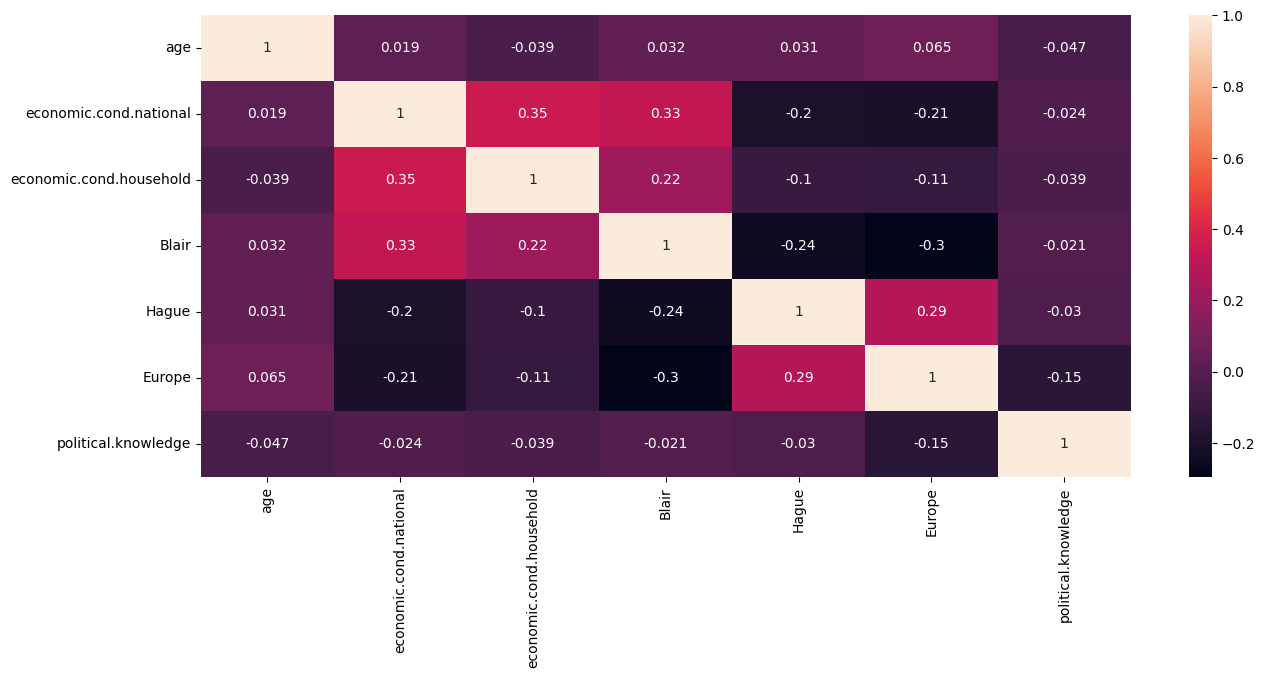

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(data_df.corr(),annot=True)

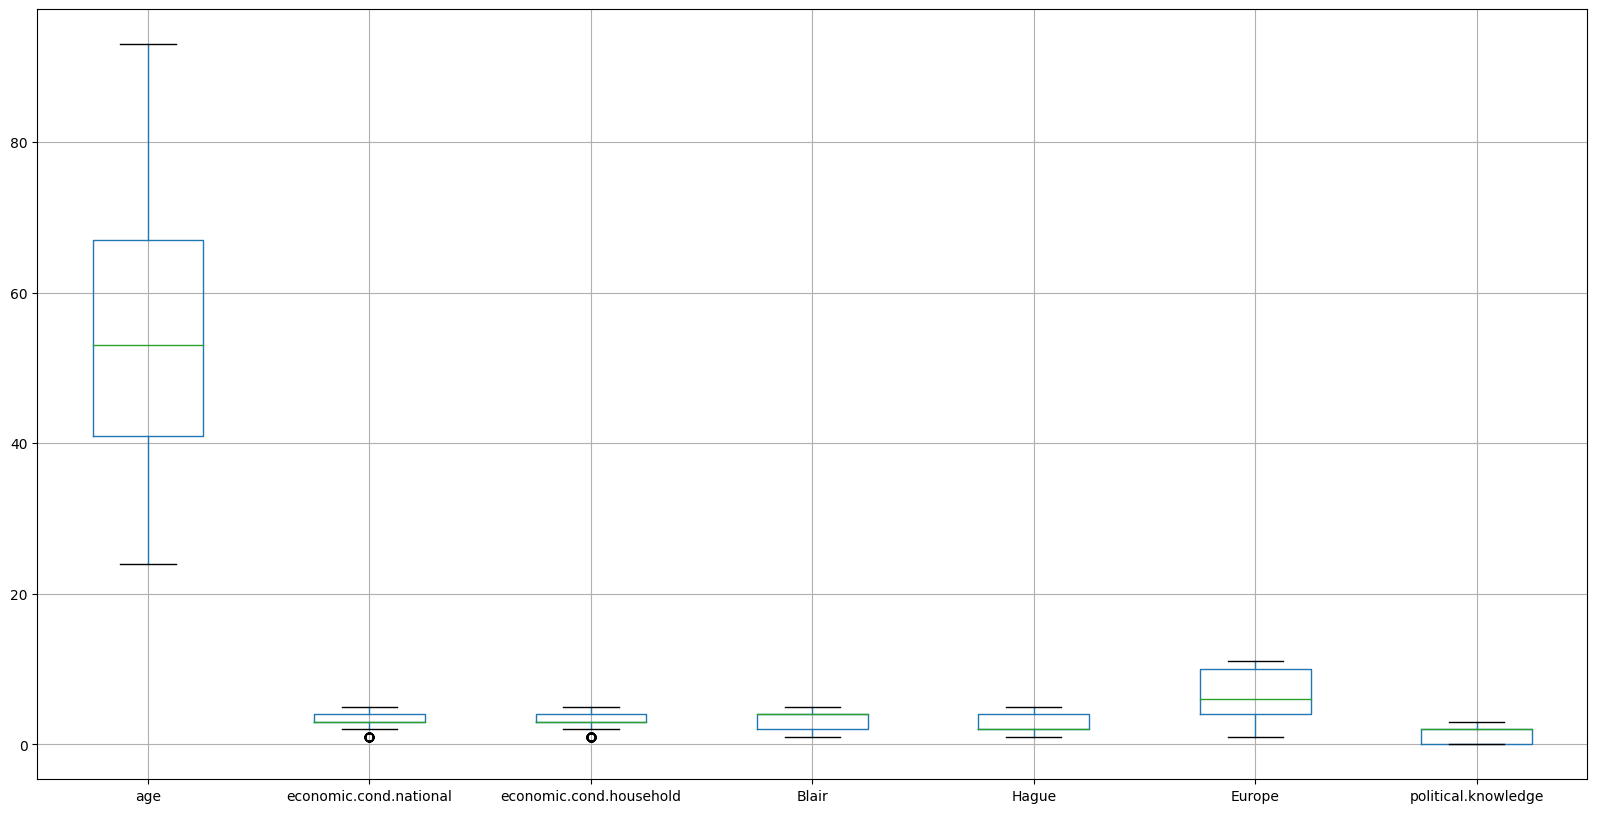

In [17]:
plt.figure(figsize=(20,10))
data_df.boxplot()
plt.show()

## Data Preprocessing

In [105]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [106]:
cat1 = ['vote', 'gender']

In [107]:
df =pd.get_dummies(data_df, columns=cat1,drop_first=True)

In [108]:
df= df.rename(columns={'vote_Labour':'IsLabour_or_not' ,'gender_male':'IsMale_or_not'},inplace= False)


In [109]:
X=df.drop('IsLabour_or_not',axis=1)
Y=df['IsLabour_or_not']

In [110]:
df.sample(10)

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_not,IsMale_or_not
838,839,75,1,3,2,2,11,2,0,0
978,979,73,2,2,4,2,10,2,1,1
362,363,54,3,3,4,4,11,1,0,1
618,619,54,4,4,2,2,3,2,1,1
637,638,56,3,3,2,4,3,2,0,0
987,988,67,3,2,2,4,11,1,0,1
782,783,35,4,4,5,2,6,2,1,1
1143,1144,82,3,5,5,2,11,0,1,0
103,104,70,2,3,2,4,8,2,0,0
656,657,68,3,3,4,3,11,2,0,0


In [111]:
# Splitting data in train and test sets
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

In [42]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (1061, 8)
Shape of test set :  (456, 8)
Percentage of classes in training set:
1    0.696513
0    0.303487
Name: IsLabour_or_not, dtype: float64
Percentage of classes in test set:
1    0.697368
0    0.302632
Name: IsLabour_or_not, dtype: float64


##Modelling:


##Naive Bayes

In [52]:
X=df.drop('IsLabour_or_not',axis=1)
Y=df['IsLabour_or_not']

In [53]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)


In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [55]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [56]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



the auc 0.888 


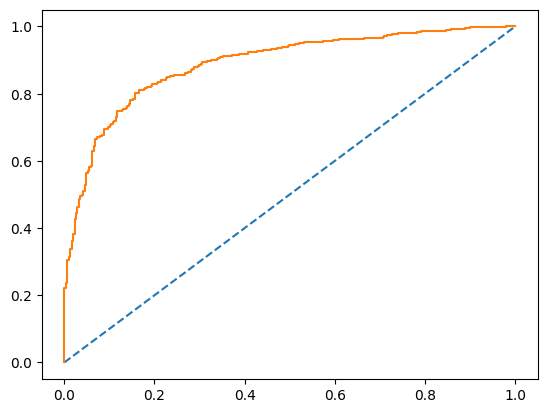

In [57]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [58]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



the auc curve 0.876 


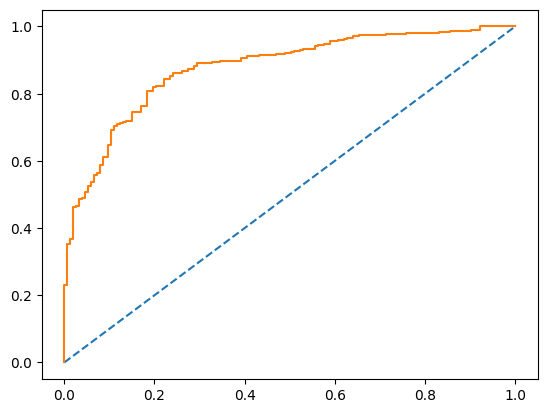

In [59]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

## KNN

NameError: name 'KNeighborsClassifier' is not defined

In [69]:
x=df.drop("IsLabour_or_not",axis=1)

y=df["IsLabour_or_not"]

In [75]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [74]:
from scipy.stats import zscore
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']].apply(zscore)


In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [78]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)

In [79]:
print(KNN_model_score)

0.8566402814423922


In [80]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[232  95]
 [ 68 742]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       327
           1       0.89      0.92      0.90       810

    accuracy                           0.86      1137
   macro avg       0.83      0.81      0.82      1137
weighted avg       0.85      0.86      0.85      1137



##Bagging Classifier (Random Forest)

In [103]:
param_grid = {'max_depth': [8, 9, 10],
              'max_features': [2, 3, 4],
              'min_samples_leaf': [5, 10, 15],
              'min_samples_split': [15, 30, 45],
              'n_estimators': [101, 301, 501],
              'class_weight': [{0: 1, 1: 2}, {1: 1, 0: 2.5}]
              }
model = RandomForestClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'f1')

In [112]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 2.5, 1: 1}],
                         'max_depth': [8, 9, 10], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [101, 301, 501]},
             scoring='f1')

In [114]:
grid_search.best_params_

{'class_weight': {0: 1, 1: 2},
 'max_depth': 9,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 101}

In [115]:
rf = grid_search.best_estimator_

In [116]:
Y_train_rf = rf.predict(X_train)
Y_test_rf = rf.predict(X_test)

###Model Evaluation - Train

In [119]:
print(classification_report(Y_train, Y_train_rf))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76       332
           1       0.86      0.98      0.91       735

    accuracy                           0.87      1067
   macro avg       0.89      0.81      0.84      1067
weighted avg       0.88      0.87      0.87      1067



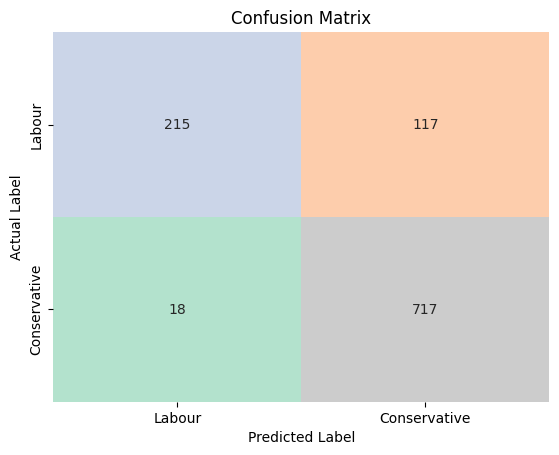

In [120]:
sns.heatmap(confusion_matrix(Y_train, Y_train_rf), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.96


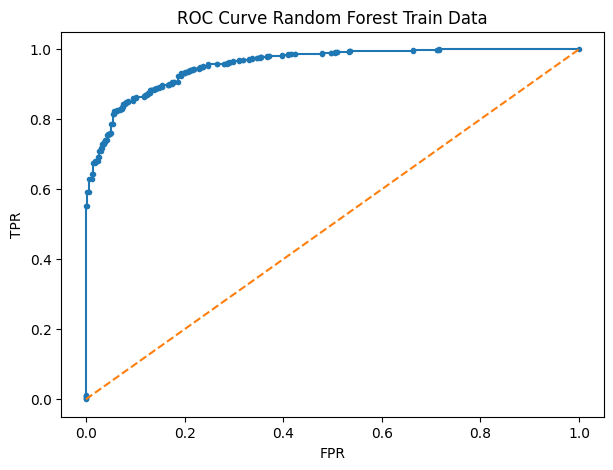

In [121]:
Y_train_predict_prob = rf.predict_proba(X_train)
probs = Y_train_predict_prob[:, 1]
auc_train_rf = roc_auc_score(Y_train, probs)
print('AUC =', round(auc_train_rf, 2))
fpr_train_rf, tpr_train_rf, thresholds = roc_curve(Y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Random Forest Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_rf, tpr_train_rf, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

### Model Evaluation - Test

In [122]:
print(classification_report(Y_test, Y_test_rf))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65       130
           1       0.85      0.92      0.88       328

    accuracy                           0.82       458
   macro avg       0.79      0.75      0.76       458
weighted avg       0.81      0.82      0.81       458



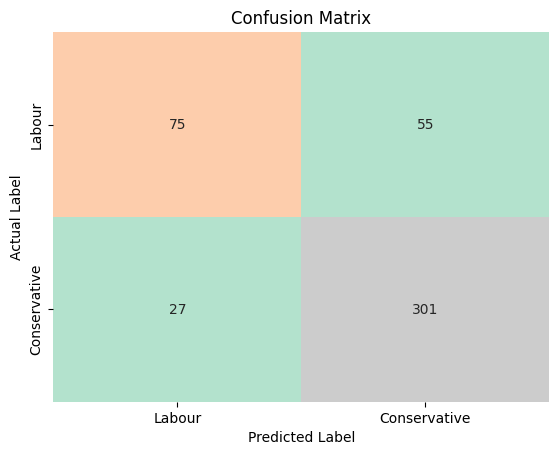

In [123]:
sns.heatmap(confusion_matrix(Y_test, Y_test_rf), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.9


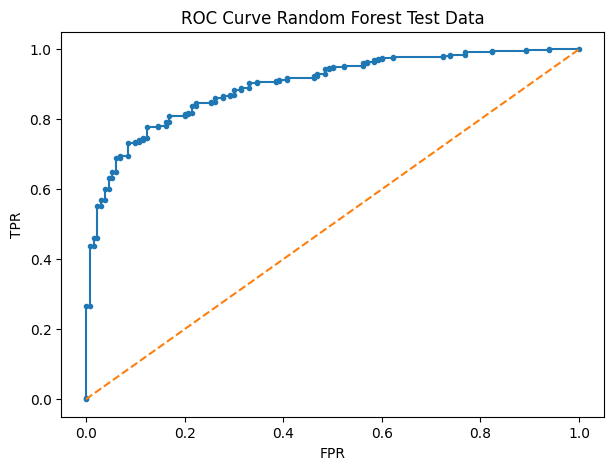

In [124]:
Y_test_predict_prob = rf.predict_proba(X_test)
probs = Y_test_predict_prob[:, 1]
auc_test_rf = roc_auc_score(Y_test, probs)
print('AUC =', round(auc_test_rf, 2))
fpr_test_rf, tpr_test_rf, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Random Forest Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_rf, tpr_test_rf, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

###Feature Importance

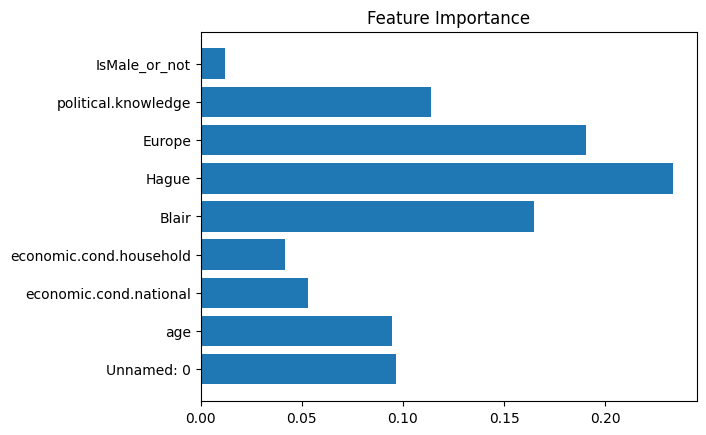

In [125]:
plt.title('Feature Importance')
plt.barh(X_train.columns, rf.feature_importances_);

##Boosting

We are going to use the default simple model as base estimator for both the boosting techniques.

###AdaBoost

In [128]:
param_grid = {'n_estimators': [21, 51, 101]}
model = AdaBoostClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, scoring = 'f1')

In [129]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'n_estimators': [21, 51, 101]}, scoring='f1')

In [130]:
grid_search.best_params_

{'n_estimators': 51}

In [131]:
abcl = grid_search.best_estimator_

In [132]:
Y_train_ab = abcl.predict(X_train)
Y_test_ab = abcl.predict(X_test)

###Model Evaluation - Train

In [133]:
print(classification_report(Y_train, Y_train_ab))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067



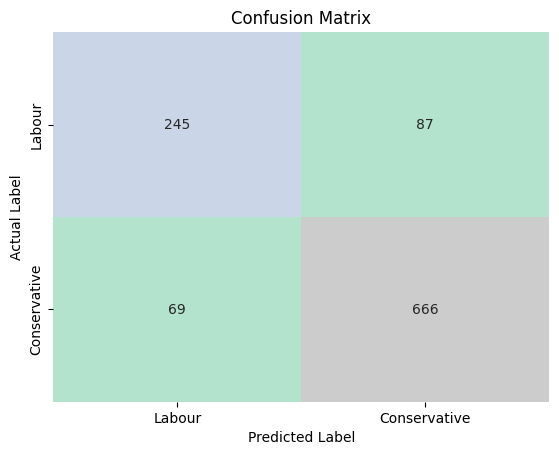

In [134]:
sns.heatmap(confusion_matrix(Y_train, Y_train_ab), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.92


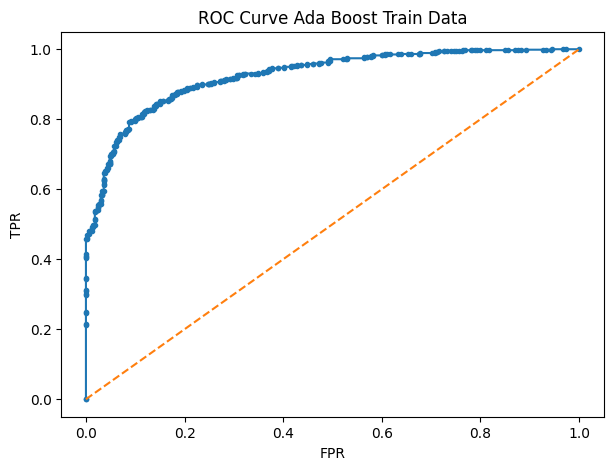

In [135]:
Y_train_predict_prob = abcl.predict_proba(X_train)
probs = Y_train_predict_prob[:, 1]
auc_train_ab = roc_auc_score(Y_train, probs)
print('AUC =', round(auc_train_ab, 2))
fpr_train_ab, tpr_train_ab, thresholds = roc_curve(Y_train, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Ada Boost Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_train_ab, tpr_train_ab, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

###Model Evaluation - Test

In [136]:
print(classification_report(Y_test, Y_test_ab))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       130
           1       0.87      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



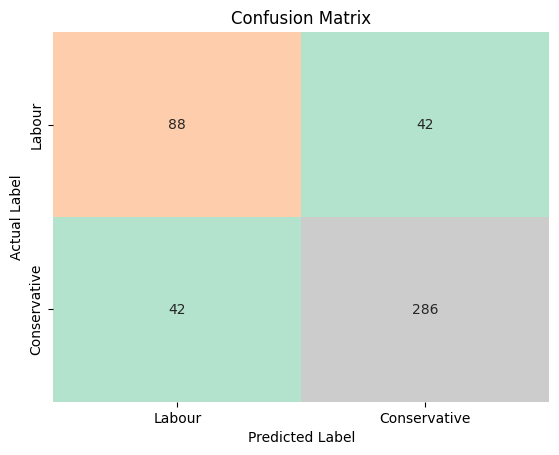

In [137]:
sns.heatmap(confusion_matrix(Y_test, Y_test_ab), annot = True, fmt = 'd', cbar = False, cmap = 'Pastel2', xticklabels = ['Labour', 'Conservative'], yticklabels = ['Labour', 'Conservative'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix');

AUC = 0.88


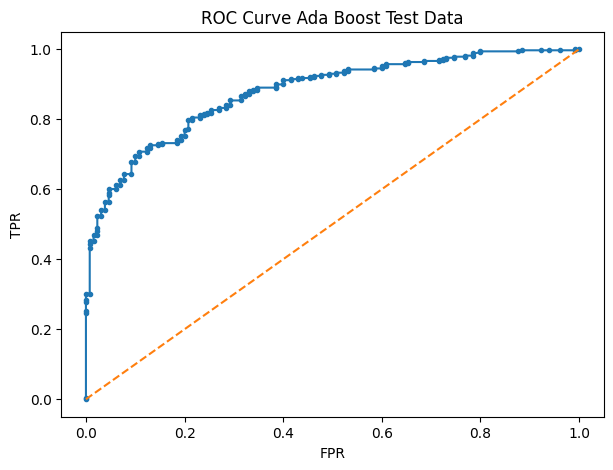

In [138]:
Y_test_predict_prob = abcl.predict_proba(X_test)
probs = Y_test_predict_prob[:, 1]
auc_test_ab = roc_auc_score(Y_test, probs)
print('AUC =', round(auc_test_ab, 2))
fpr_test_ab, tpr_test_ab, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize = [7, 5])
plt.title('ROC Curve Ada Boost Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr_test_ab, tpr_test_ab, marker = '.')
plt.plot([0,1], [0,1], linestyle = '--');

We can see, The Precision, Recall, Accuracy & AUC of training data for the model is inline with the testing data and is fairly high. Hence, no overfitting or underfitting has occured & the model can be used for making predictions.

#Final Model Selection

Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

Model performance of each model has already been observed.

Since Logistic Regression & LDA model showed similar performace even after tuning with the solver & learning rate, we can use any of the tuned or untuned model for comparison with other models. Here, we use the tuned model for comparison with other models.

### Model Comparisons

In [139]:
model_names = ['Naive Bayes', 'KNN', 'Bagging (RF)', 'Ada Boost']
#model_names = ['Logistic Regression', 'LDA', 'Naive Bayes', 'KNN', 'Bagging (RF)', 'Ada Boost', 'Gradient Boost']

NameError: name 'fpr_train_gnb' is not defined

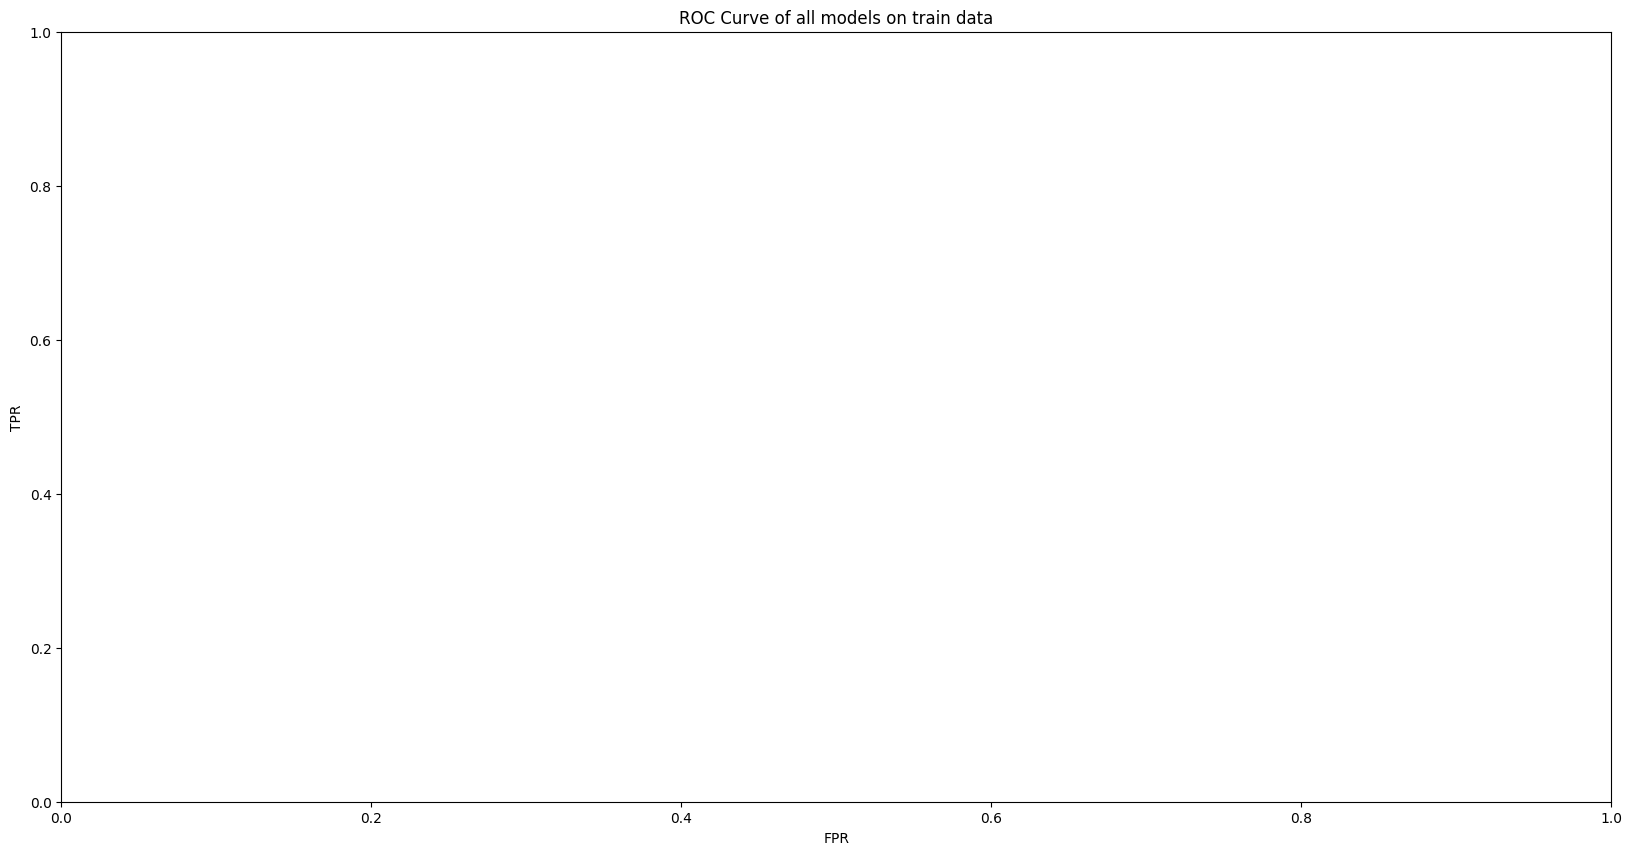

In [140]:
plt.figure(figsize = [20, 10])
plt.title('ROC Curve of all models on train data')
plt.xlabel('FPR')
plt.ylabel('TPR')

#plt.plot(fpr_train_tlr, tpr_train_tlr)
#plt.plot(fpr_train_tlda, tpr_train_tlda)
plt.plot(fpr_train_gnb, tpr_train_gnb)
plt.plot(fpr_train_tknn, tpr_train_tknn)
plt.plot(fpr_train_rf, tpr_train_rf)
plt.plot(fpr_train_ab, tpr_train_ab)
#plt.plot(fpr_train_gb, tpr_train_gb)
plt.plot([0,1], [0,1], linestyle = '--')

plt.legend(model_names)
plt.show()

In [ ]:
plt.figure(figsize = [20, 10])
plt.title('ROC Curve of all models on test data')
plt.xlabel('FPR')
plt.ylabel('TPR')

#plt.plot(fpr_test_tlr, tpr_test_tlr)
#plt.plot(fpr_test_tlda, tpr_test_tlda)
plt.plot(fpr_test_gnb, tpr_test_gnb)
plt.plot(fpr_test_tknn, tpr_test_tknn)
plt.plot(fpr_test_rf, tpr_test_rf)
plt.plot(fpr_test_ab, tpr_test_ab)
#plt.plot(fpr_test_gb, tpr_test_gb)
plt.plot([0,1], [0,1], linestyle = '--')

plt.legend(model_names)
plt.show()

In [ ]:
for i, label in enumerate(Y_train_gnb):
  if label == 'Conservative':
    Y_train_gnb[i] = 1
  else:
    Y_train_gnb[i] = 0
Y_train_gnb = Y_train_gnb.astype('int64')

for i, label in enumerate(Y_test_gnb):
  if label == 'Conservative':
    Y_test_gnb[i] = 1
  else:
    Y_test_gnb[i] = 0
Y_test_gnb = Y_test_gnb.astype('int64')

In [ ]:
f1_train_conservative = [f1_score(Y_train, Y_train_gnb), f1_score(Y_train, Y_train_tknn),
                         f1_score(Y_train, Y_train_rf), f1_score(Y_train, Y_train_ab)]

f1_test_conservative = [f1_score(Y_test, Y_test_gnb), f1_score(Y_test, Y_test_tknn),
                        f1_score(Y_test, Y_test_rf), f1_score(Y_test, Y_test_ab)]

f1_train_labour = [f1_score(Y_train, Y_train_gnb, pos_label = 0),
                  f1_score(Y_train, Y_train_tknn, pos_label = 0), f1_score(Y_train, Y_train_rf, pos_label = 0), f1_score(Y_train, Y_train_ab, pos_label = 0)]                  ]

f1_test_labour = [ f1_score(Y_test, Y_test_gnb, pos_label = 0),
                  f1_score(Y_test, Y_test_tknn, pos_label = 0), f1_score(Y_test, Y_test_rf, pos_label = 0), f1_score(Y_test, Y_test_ab, pos_label = 0)
                  ]

accuracy_train = [ accuracy_score(Y_train, Y_train_gnb), best_knn.score(X_train, Y_train),
                  rf.score(X_train, Y_train), abcl.score(X_train, Y_train)]

accuracy_test = [accuracy_score(Y_test, Y_test_gnb), best_knn.score(X_test, Y_test),
                 rf.score(X_test, Y_test),abcl.score(X_test, Y_test)]

auc_train = [auc_train_gnb, auc_train_tknn, auc_train_rf, auc_train_ab]

auc_test = [auc_test_gnb, auc_test_tknn, auc_test_rf, auc_test_ab]

In [ ]:
model_metrics = round(pd.DataFrame({'f1_train_conservative': f1_train_conservative, 'f1_test_conservative': f1_test_conservative, 'f1_train_labour': f1_train_labour,
              'f1_test_labour': f1_train_labour, 'Accuracy_train': accuracy_train, 'Accuracy_test': accuracy_test, 'AUC_train': auc_train, 'AUC_test': auc_test},
               index = model_names) * 100, 2)
model_metrics

In [ ]:
model_metrics_test = model_metrics[model_metrics.columns[model_metrics.columns.str.contains('test')]] #Test data model metrics
model_metrics_test['f1_test_diff'] = model_metrics_test['f1_test_conservative'] - model_metrics_test['f1_test_labour']
model_metrics_test

In [ ]:
print('Highest Metric Models\n')
for i in model_metrics_test.columns:
  print(i.replace('_test', ''), '-', model_metrics_test[i].sort_values(ascending = False).head().index.values[0:2])

Insights:

We can see and chekc all the models have approximately similar performance metrics.
As we can check as per the visulisation, all the models have a fairly high test & train accuracy, AUC score, performance metrics of the majority class (Labour). However all the models show a slightly inferior performance when it comes to predicting the minority class (Conservative).

Final Model -> RandomForestClassifier(class_weight = {0: 1, 1: 2}, max_depth = 9, max_features = 2, min_samples_leaf = 5, min_samples_split = 30, n_estimators = 101, random_state = 1)

#Problem 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.stem import WordNetLemmatizer
import re

from wordcloud import WordCloud

from nltk.corpus import inaugural

import warnings
warnings.filterwarnings("ignore")

In [5]:
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [7]:
len(inaugural.fileids())

59

In [8]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [9]:
file_names = ['1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt']

In [10]:
years = [1941, 1961, 1973]

In [11]:
names = ['Franklin D. Roosevelt', 'John F. Kennedy', 'Richard Nixon']

In [12]:
speeches = []
for i in file_names:
  speeches.append(inaugural.raw(i))

## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

###No of Characters in Speech

In [13]:
for i in range(0, len(file_names)):
  print("The No. of characters in President", names[i] + "'s speech in", years[i], "is", len(speeches[i]))

The No. of characters in President Franklin D. Roosevelt's speech in 1941 is 7571
The No. of characters in President John F. Kennedy's speech in 1961 is 7618
The No. of characters in President Richard Nixon's speech in 1973 is 9991


### No of Words in Speech

In [14]:
for i in range(0, len(file_names)):
  print("The No. of words in President", names[i] + "'s speech in", years[i], "is", len(inaugural.words(file_names[i])))

The No. of words in President Franklin D. Roosevelt's speech in 1941 is 1536
The No. of words in President John F. Kennedy's speech in 1961 is 1546
The No. of words in President Richard Nixon's speech in 1973 is 2028


### No of Sentences in Speech

In [15]:
for i in range(0, len(file_names)):
  print("The No. of sentences in President", names[i] + "'s speech in", years[i], "is", len(inaugural.sents(file_names[i])))

The No. of sentences in President Franklin D. Roosevelt's speech in 1941 is 68
The No. of sentences in President John F. Kennedy's speech in 1961 is 52
The No. of sentences in President Richard Nixon's speech in 1973 is 69


###Remove all the stopwords from all three speeches.

####Text Preprocessing

In [16]:
df = pd.DataFrame(speeches, index = names, columns = ['Speech'])
df

,Speech
Franklin D. Roosevelt,On each national day of inauguration since 178...
John F. Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
Richard Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


####Lower case Conversion

In [17]:
df['Speech'] = df['Speech'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df

,Speech
Franklin D. Roosevelt,on each national day of inauguration since 178...
John F. Kennedy,"vice president johnson, mr. speaker, mr. chief..."
Richard Nixon,"mr. vice president, mr. speaker, mr. chief jus..."


####Special Characters & Punctuation Removal

In [18]:
df['Speech'] = df['Speech'].str.replace('[^\w\s]', '') #removes everything except words(letters, numbers, underscore) & spaces
df

,Speech
Franklin D. Roosevelt,on each national day of inauguration since 178...
John F. Kennedy,vice president johnson mr speaker mr chief jus...
Richard Nixon,mr vice president mr speaker mr chief justice ...


#### Stopwords & Punctuation Removal

In [19]:
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
stopwords.extend(['mr', 'mrs', 'let', 'us'])
df['Speech'] = df['Speech'].apply(lambda x: ' '.join(x for x in x.split() if x not in stopwords))
df

,Speech
Franklin D. Roosevelt,national day inauguration since 1789 people re...
John F. Kennedy,vice president johnson speaker chief justice p...
Richard Nixon,vice president speaker chief justice senator c...


In [20]:
df.iloc[0][0] ## # a snippet of roosevelt's speech post stopwords removal

'national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vit

In [21]:
df['char_count'] = df['Speech'].str.len()
df['word_count'] = df['Speech'].apply(lambda x: len(str(x).split()))
df

,Speech,char_count,word_count
Franklin D. Roosevelt,national day inauguration since 1789 people re...,4562,618
John F. Kennedy,vice president johnson speaker chief justice p...,4665,663
Richard Nixon,vice president speaker chief justice senator c...,5771,781


### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words.

In [28]:
df_new = pd.DataFrame(columns=['Speech', 'names'])

In [68]:
#for i in range(0, len(df.index)):

  #print("The top 3 words with their count in President", names[i] + "'s speech are:", nltk.FreqDist(df.iloc[i]['Speech'].split()).most_common(3), '\n')
  #var1 = nltk.FreqDist(df.iloc[i]['Speech'].split()).most_common(3)
  #df_new.loc[i, 'Speech'] = nltk.FreqDist(df.iloc[i]['Speech'].split()).most_common(3)
  #df_new.names = names[i]
for i in range(0, len(df.index)):
  print("The top 3 words with their count in President", names[i] + "'s speech are:", nltk.FreqDist(df.iloc[i]['Speech'].split()).most_common(3), '\n')
  var1 = nltk.FreqDist(df.iloc[i]['Speech'].split()).most_common(3)
#  df_new.loc[i, 'Speech'] = str(var1)
  df_new.loc[i, 'Speech'] = str(var1)
  df_new.loc[i, 'names'] = names[i]
  df_new = df_new.append(df_new.loc[i])
#  df_new.loc[i, 'Speech'] = var1[1][0]
#  df_new.loc[i, 'names'] = names[i]
#  df_new = df_new.append(df_new.loc[i])
#  df_new.loc[i, 'Speech'] = var1[2][0]



#print ('var1->',var1[0][0])
 # print ('var11->',var1[1][0])
  #print ('var111->',var1[2][0])
  #print ('var2->',names[i])
 # print ('i is',i)






The top 3 words with their count in President Franklin D. Roosevelt's speech are: [('nation', 11), ('know', 10), ('spirit', 9)] 

The top 3 words with their count in President John F. Kennedy's speech are: [('world', 8), ('sides', 8), ('new', 7)] 

The top 3 words with their count in President Richard Nixon's speech are: [('peace', 19), ('world', 16), ('new', 15)] 



In [70]:
df_new.drop_duplicates(inplace = True)

In [67]:
df_new.drop(index=df_new.index, axis=0, inplace=True)


In [71]:
df_new.head(20)

,Speech,names
0,"[('nation', 11), ('know', 10), ('spirit', 9)]",Franklin D. Roosevelt
1,"[('world', 8), ('sides', 8), ('new', 7)]",John F. Kennedy
2,"[('peace', 19), ('world', 16), ('new', 15)]",Richard Nixon


In [ ]:
new_df=Airline_tweets[Airline_tweets['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
len(words.split())

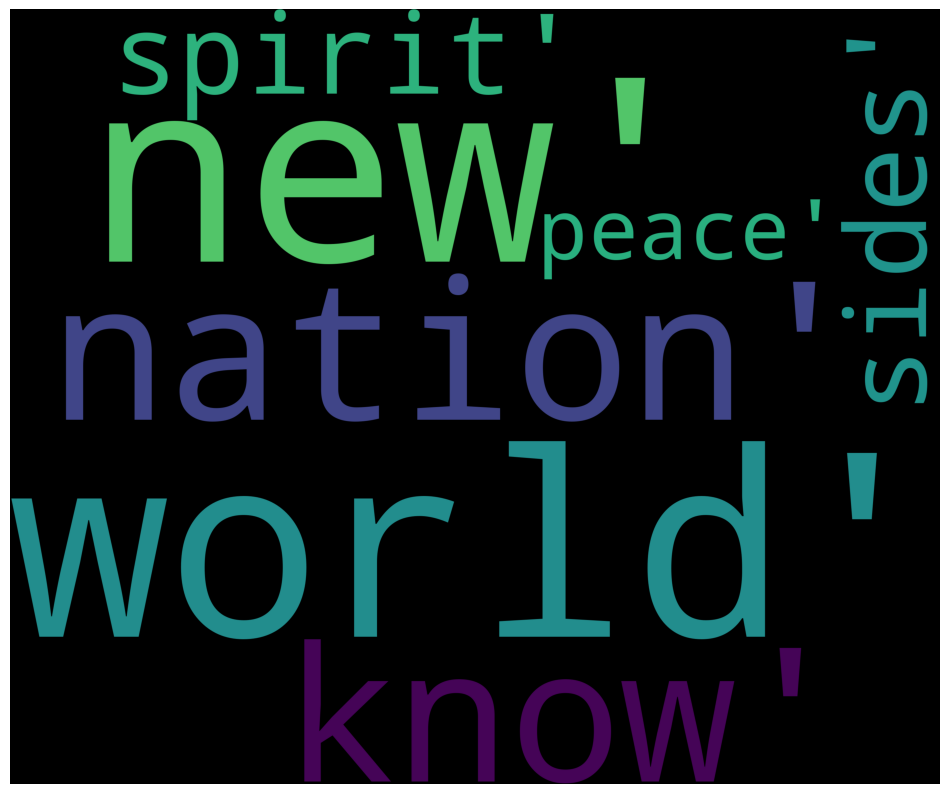

In [78]:
from wordcloud import WordCloud,STOPWORDS
#new_df=Airline_tweets[Airline_tweets['airline_sentiment']=='negative']
#index_column = 'Speech'
#df_new1=df_new[df_new[index]==1]
df1 = df_new[df_new['names'] == 'Franklin D. Roosevelt']
words = ' '.join(df_new['Speech'])
#words = ' '.join(var1)
#words = ' '.join([tup[0] for tup in var1])
cleaned_word = ' '.join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'

                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

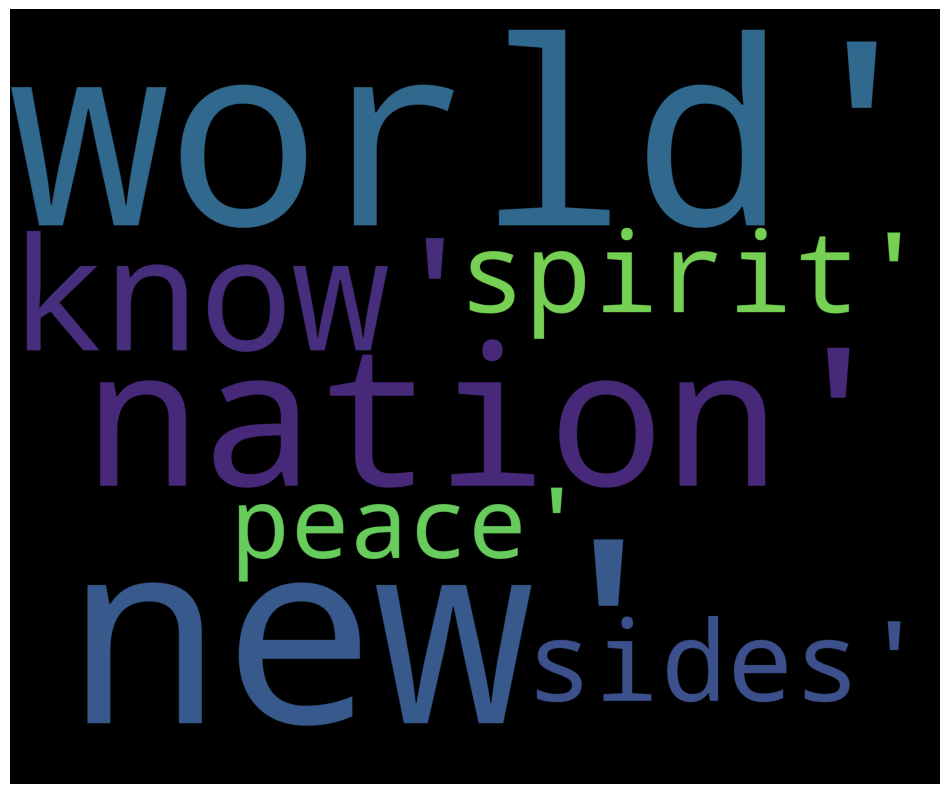

In [79]:
from wordcloud import WordCloud,STOPWORDS
#new_df=Airline_tweets[Airline_tweets['airline_sentiment']=='negative']
#index_column = 'Speech'
#df_new1=df_new[df_new[index]==1]
df1 = df_new[df_new['names'] == 'John F. Kennedy']
words = ' '.join(df_new['Speech'])
#words = ' '.join(var1)
#words = ' '.join([tup[0] for tup in var1])
cleaned_word = ' '.join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'

                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

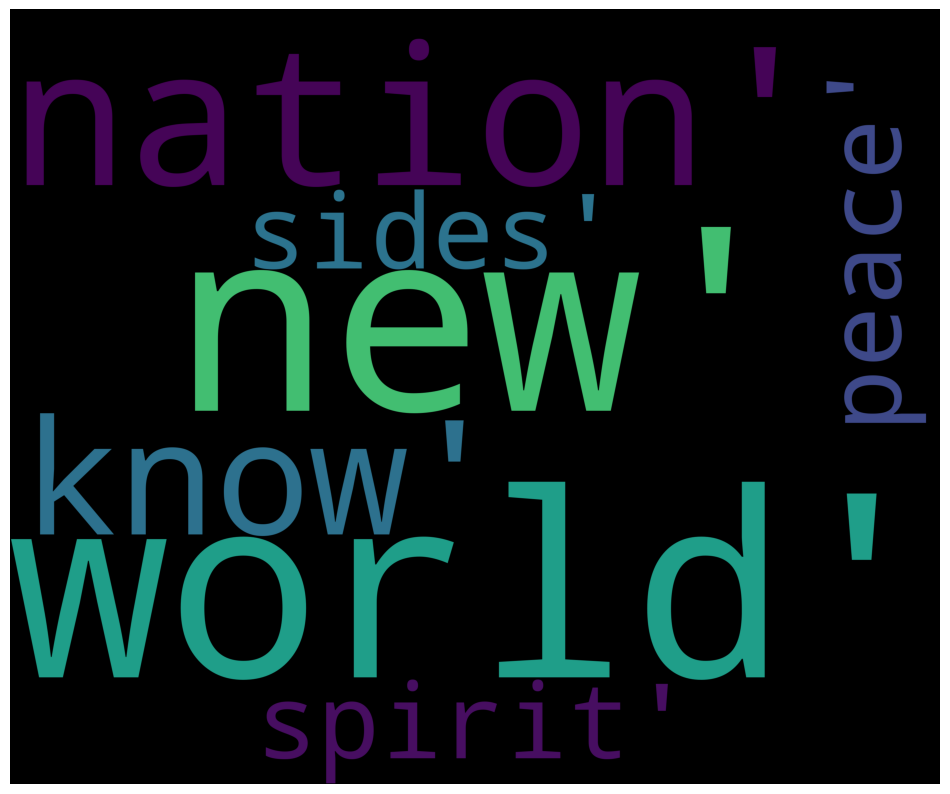

In [80]:
from wordcloud import WordCloud,STOPWORDS
#new_df=Airline_tweets[Airline_tweets['airline_sentiment']=='negative']
#index_column = 'Speech'
#df_new1=df_new[df_new[index]==1]
df1 = df_new[df_new['names'] == 'Richard Nixon']
words = ' '.join(df_new['Speech'])
#words = ' '.join(var1)
#words = ' '.join([tup[0] for tup in var1])
cleaned_word = ' '.join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'

                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()